**Import All Required Packages**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Read data from csv**

In [ ]:
dt = pd.read_csv('website_review.csv',encoding= 'latin1')
dt.head()

,Unnamed: 0,Domain_name,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Category
0,0,tinder.com,NaN,Absolutely wonderful for finding partners,4.0,1.0,0,Dating
1,1,Instagram.com,NaN,Love this Website! User experience is amazing.,5.0,1.0,4,Social Media
2,2,wikipedia.org,Some major user design flaws,I had such high hopes for this Website and rea...,3.0,0.0,0,Encyclopedia
3,3,Youtube.com,My favorite timepass!,"I love, love, love this . it's fun, user frien...",5.0,1.0,0,Entertainment
4,4,epicgames.com,Flattering experience,This experience is very flattering ..love this...,5.0,1.0,6,Gaming


**Drop unnecessary columns**

In [ ]:
df = df.drop(['Title', 'Positive Feedback Count', 'Unnamed: 0', ], axis=1)
df.dropna(inplace=True)

**Calculation of Polarity**

In [ ]:
df['Polarity_Rating'] = df['Rating'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [ ]:
df.head()

,Domain_name,Review Text,Rating,Recommended IND,Category,Polarity_Rating
0,tinder.com,Absolutely wonderful for finding partners,4.0,1.0,Dating,Positive
1,Instagram.com,Love this Website! User experience is amazing.,5.0,1.0,Social Media,Positive
2,wikipedia.org,I had such high hopes for this Website and rea...,3.0,0.0,Encyclopedia,Neutral
3,Youtube.com,"I love, love, love this . it's fun, user frien...",5.0,1.0,Entertainment,Positive
4,epicgames.com,This experience is very flattering ..love this...,5.0,1.0,Gaming,Positive


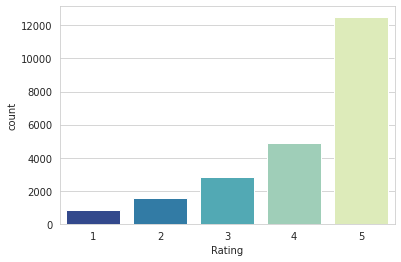

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Rating',data=df, palette='YlGnBu_r')

**Plot the Polarity Rating count**

<AxesSubplot:xlabel='Polarity_Rating', ylabel='count'>

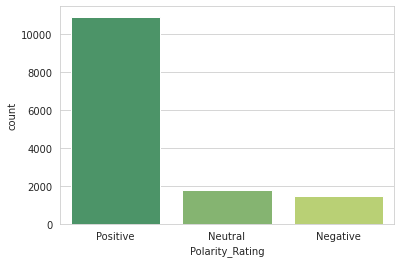

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Polarity_Rating',data=df, palette='summer')

**Data Preprocessing**

In [ ]:
df_Positive = df[df['Polarity_Rating'] == 'Positive'][0:8000]
df_Neutral = df[df['Polarity_Rating'] == 'Neutral']
df_Negative = df[df['Polarity_Rating'] == 'Negative']

**Sample negative and neutral polarity dataset and create final dataframe**

In [ ]:
df_Neutral_over = df_Neutral.sample(8000, replace=True)
df_Negative_over = df_Negative.sample(8000, replace=True)
df = pd.concat([df_Positive, df_Neutral_over, df_Negative_over], axis=0)

**Text Preprocessing**

In [ ]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

**Apply the method "get_text_processing" into column review text**

In [ ]:
df['review'] = df['Review Text'].apply(get_text_processing)
df.head()

,Domain_name,Review Text,Rating,Recommended IND,Category,Polarity_Rating,review
0,tinder.com,Absolutely wonderful for finding partners,4.0,1.0,Dating,Positive,Absolutely wonderful finding partners
1,Instagram.com,Love this Website! User experience is amazing.,5.0,1.0,Social Media,Positive,Love Website User experience amazing
3,Youtube.com,"I love, love, love this . it's fun, user frien...",5.0,1.0,Entertainment,Positive,love love love fun user friendly fabulous
4,epicgames.com,This experience is very flattering ..love this...,5.0,1.0,Gaming,Positive,experience flattering love experienceThe games...
6,Amazon.com,I aded this in my basket at hte last mintue to...,5.0,1.0,E Commerce,Positive,aded basket hte last mintue see would look lik...


**Visualize Text Review with Polarity Rating**

In [ ]:
df = df[['review', 'Polarity_Rating']]
df.head()

,review,Polarity_Rating
0,Absolutely wonderful finding partners,Positive
1,Love Website User experience amazing,Positive
3,love love love fun user friendly fabulous,Positive
4,experience flattering love experienceThe games...,Positive
6,aded basket hte last mintue see would look lik...,Positive


**Apply encoding on negative, neutral, and positive**

In [ ]:
one_hot = pd.get_dummies(df["Polarity_Rating"])
df.drop(['Polarity_Rating'],axis=1,inplace=True)
df = pd.concat([df,one_hot],axis=1)
df.head()

,review,Negative,Neutral,Positive
0,Absolutely wonderful finding partners,0,0,1
1,Love Website User experience amazing,0,0,1
3,love love love fun user friendly fabulous,0,0,1
4,experience flattering love experienceThe games...,0,0,1
6,aded basket hte last mintue see would look lik...,0,0,1


**Apply Train Test Split**

In [ ]:
X = df['review'].values
y = df.drop('review', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

**Apply vectorization**

In [ ]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

**Apply frequency, inverse document frequency:**

In [ ]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

**Add different layers**

In [ ]:
model = Sequential()

model.add(Dense(units=12673,activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(units=4000,activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(units=500,activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='sigmoid'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

**Fit the Model**

In [ ]:

model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)

Epoch 1/100
66/66 [==============================] - 358s 5s/step - loss: 0.5918 - accuracy: 0.7655 - val_loss: 0.3769 - val_accuracy: 0.8619
Epoch 2/100
66/66 [==============================] - 373s 6s/step - loss: 0.2085 - accuracy: 0.9330 - val_loss: 0.2623 - val_accuracy: 0.9178
Epoch 3/100
66/66 [==============================] - 390s 6s/step - loss: 0.1159 - accuracy: 0.9638 - val_loss: 0.2552 - val_accuracy: 0.9307
Epoch 4/100
66/66 [==============================] - 401s 6s/step - loss: 0.0875 - accuracy: 0.9738 - val_loss: 0.2893 - val_accuracy: 0.9292
Epoch 5/100
66/66 [==============================] - 393s 6s/step - loss: 0.0639 - accuracy: 0.9782 - val_loss: 0.3349 - val_accuracy: 0.9333
Epoch 5: early stopping


**Evaluation of Model**

In [ ]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])


113/113 [==============================] - 43s 383ms/step - loss: 0.3349 - accuracy: 0.9333
Test accuracy: 0.9333333373069763


Activation Function

Input Layer - tanh          

Output Layer - sigmoid

Accuracy score = 0.92847

Input Layer - relu          

Output Layer - softmax

Accuracy score = 0.92222




In [ ]:
preds = model.predict(Xtest)
preds

225/225 [==============================] - 58s 258ms/step


array([[0.02834526, 0.10154445, 0.9952289 ],
       [0.9975695 , 0.20001861, 0.00817822],
       [0.99245775, 0.01471054, 0.26589903],
       ...,
       [0.99018365, 0.25758162, 0.02365803],
       [0.14733887, 0.02649035, 0.990353  ],
       [0.10352454, 0.03736075, 0.9904264 ]], dtype=float32)

In [ ]:
from sklearn import metrics
def get_metrics(true_labels, predicted_labels):

    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels,
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels,
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels,
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels,
                                               predicted_labels,
                                               average='weighted'),
                        4))

def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):

    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels,
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm,
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes],
                                                  codes=level_labels),
                            index=pd.MultiIndex(levels=[['Actual:'], classes],
                                                codes=level_labels))
    print(cm_frame)

def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=X_test, predicted_labels=preds)

    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=X_test, predicted_labels=preds,
                             classes=classes)


In [ ]:
display_model_performance_metrics(true_labels, predicted_labels, classes=[0,1])

Model Performance metrics:
------------------------------
Accuracy: 0.9287
Precision: 0.9261
Recall: 0.9266
F1 Score: 0.9266

Prediction Confusion Matrix:
------------------------------
          Predicted:       
                   0      1
Actual: 0      2305   188
        1       126  1787
